In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score,validation_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data = pd.read_csv('datasets/Project_14_Car_data.csv')

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.shape

(1728, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


All column are having object data type, will check for the values of each feature.

In [6]:
for col in data.columns:
    print(data[col].unique(),"      ",data[col].nunique())

['vhigh' 'high' 'med' 'low']        4
['vhigh' 'high' 'med' 'low']        4
['2' '3' '4' '5more']        4
['2' '4' 'more']        3
['small' 'med' 'big']        3
['low' 'med' 'high']        3
['unacc' 'acc' 'vgood' 'good']        4


In [7]:
#Checking the unique value count

for col in data.columns:
    print(data[col].value_counts())
    print()

high     432
med      432
low      432
vhigh    432
Name: buying, dtype: int64

high     432
med      432
low      432
vhigh    432
Name: maint, dtype: int64

2        432
4        432
5more    432
3        432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

med      576
small    576
big      576
Name: lug_boot, dtype: int64

high    576
med     576
low     576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



All columns have distributted equally, let check for class.

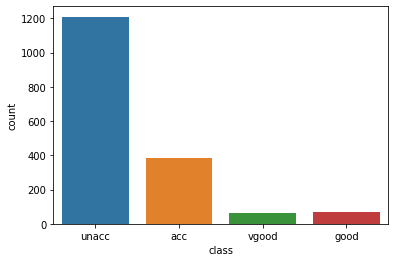

In [8]:
sns.countplot(data['class'])

As we can see, class data is not distributed equally or partially among all feature. As unacc is having larger values than other hence we will consider it is unbalanced data

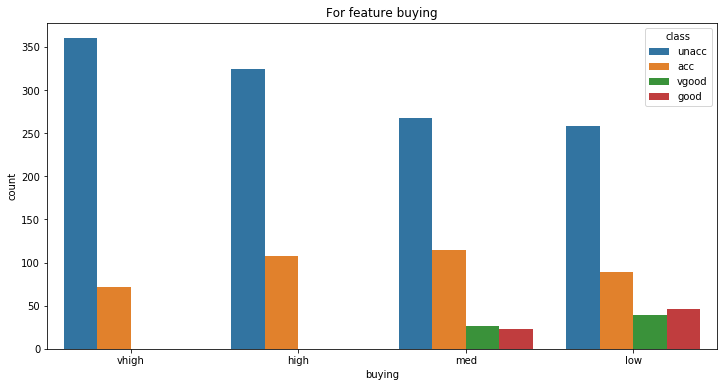

In [9]:
#Checking class corresponding to buying

plt.figure(figsize=(12,6))
plt.title("For feature buying")
sns.countplot(data['buying'],hue=data['class'])

As we can see, class value unacc is high across all values of buying

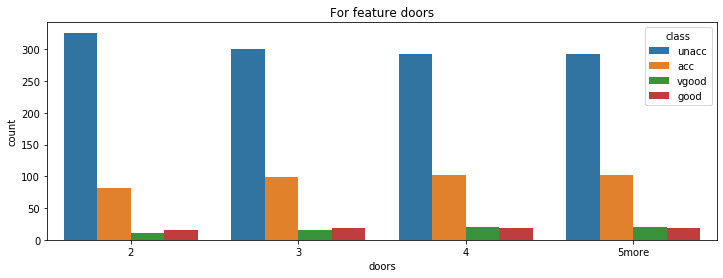

In [10]:
plt.figure(figsize=(12,4))
plt.title("For feature doors")
sns.countplot(data['doors'],hue=data['class'])

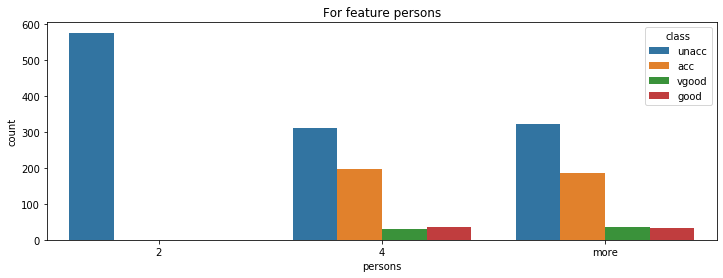

In [11]:
plt.figure(figsize=(12,4))
plt.title("For feature persons")
sns.countplot(data['persons'],hue=data['class'])

As from the above graphs it is clear that unacc is highly distributed

In [12]:
#Encoding feature
le = LE()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [13]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


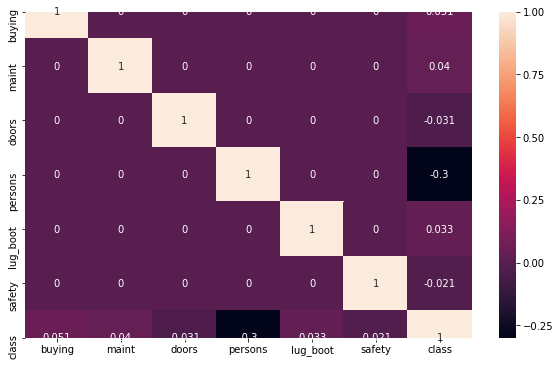

In [14]:
#Lets check the correlation of dataset
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

From the above heatmap, we can see that most of the columns shows very week correlation with 'class'.

Person showing week correlation with class


In [15]:
#Describe the data

data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,1.553241
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.875948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,1.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


Data looks like normally distributed.

### SPLITTING DATA

In [16]:
x = data.drop(['class'],axis=1)
y = data['class']

In [17]:
x.shape

(1728, 6)

In [18]:
y.shape

(1728,)

### TRAIN TEST SPLIT

In [19]:
def best_model(model):
    i = 0
    max_accu_score = 0 #max accuracy score defining
    for r_state in range(42,101):
        train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
        model.fit(train_x,train_y)
        pred_y = model.predict(test_x)
        accu_score = accuracy_score(test_y,pred_y)
        accu_score = round(accu_score*100)
        if accu_score > max_accu_score:
            max_accu_score = accu_score
            final_r_state = r_state
    print("Max Accuracy Score Corresponding to random state ", final_r_state, " is ",max_accu_score)    
    return max_accu_score

In [20]:
def cross_val_function(model):
    score = cross_val_score(model,x,y,cv=10,scoring="accuracy")

    print('Cross Val Score: ', score)
    print('Mean Scores: ',score.mean())
    print('Standard deviation: ',score.std())

    print('Accuracy Score :', round(score.mean()*100))
    
    accu_score = round(score.mean()*100)
    return accu_score

In [21]:
lor = LR(solver='newton-cg',multi_class='multinomial')
tt_lor = best_model(lor)

Max Accuracy Score Corresponding to random state  67  is  74.0


In [22]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=67)
lor.fit(train_x,train_y)
pred_y = lor.predict(test_x)
roc_auc_score = accuracy_score(test_y,pred_y)
roc_auc_score = round((roc_auc_score)*(100))
print("ROC AUC score is : ", roc_auc_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))

ROC AUC score is :  74.0
Confusion matrix is

[[ 13   0  54   3]
 [  1   0   7   0]
 [ 15   0 239   1]
 [  5   0   5   3]]
Classification report 

              precision    recall  f1-score   support

           0       0.38      0.19      0.25        70
           1       0.00      0.00      0.00         8
           2       0.78      0.94      0.85       255
           3       0.43      0.23      0.30        13

    accuracy                           0.74       346
   macro avg       0.40      0.34      0.35       346
weighted avg       0.67      0.74      0.69       346



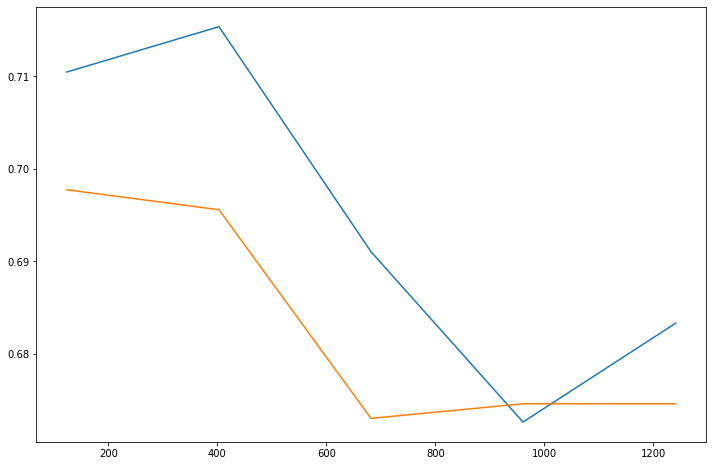

In [23]:
#Checking for learning curve

lc=learning_curve(lor,train_x,train_y,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

From the above graph, with increasing number of sample accuracy is increasing at some point and decreasing at some point.

In [24]:
#Using GridSearchCV

param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LR(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)
grid.fit(train_x,train_y)
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'multi_class': 'multinomial', 'solver': 'newton-cg'}
0.6939218523878437


So, with the above parameters, we can get at accuary of 70%.

#### KNN

In [25]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNN(n_jobs=-1)
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 5}

In [26]:
knn = KNN(n_neighbors=5)
tt_knn = best_model(knn)

Max Accuracy Score Corresponding to random state  47  is  94.0


In [27]:
#Lets check with cross_val
cr_knn = cross_val_function(knn)

Cross Val Score:  [0.64942529 0.66666667 0.70689655 0.68390805 0.71676301 0.70348837
 0.76162791 0.80813953 0.84302326 0.85380117]
Mean Scores:  0.7393739796862571
Standard deviation:  0.06954717809778632
Accuracy Score : 74.0


### DTC

In [28]:
#using train test split 
    
dtc = DTC()
tt_dtc = best_model(dtc)

Max Accuracy Score Corresponding to random state  54  is  99.0


In [29]:
#using cross_val

cr_dtc = cross_val_function(dtc)

Cross Val Score:  [0.62643678 0.79310345 0.95402299 0.75287356 0.9132948  0.95930233
 0.87209302 0.88953488 0.95930233 0.95321637]
Mean Scores:  0.8673180511705597
Standard deviation:  0.10539348409908862
Accuracy Score : 87.0


### SVC

In [30]:
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [31]:
svc=SVC(kernel="rbf",C=10)
cross_val_function(svc)

Cross Val Score:  [0.83908046 0.87356322 0.98275862 0.83333333 0.97687861 0.95930233
 0.88953488 0.95348837 0.98837209 0.93567251]
Mean Scores:  0.9231984433939159
Standard deviation:  0.05639292192526745
Accuracy Score : 92.0


92.0

In [32]:
#Using train test

tt_svc = best_model(svc)

Max Accuracy Score Corresponding to random state  46  is  100.0


### RFC

In [33]:
rfc = RFC() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [34]:
rfc=RFC(n_estimators=100)
best_model(rfc)

Max Accuracy Score Corresponding to random state  61  is  100.0


100.0

In [35]:
cross_val_function(rfc)

Cross Val Score:  [0.72413793 0.73563218 0.8908046  0.75862069 0.9132948  0.94186047
 0.8372093  0.86627907 0.97093023 0.88304094]
Mean Scores:  0.8521810205426668
Standard deviation:  0.0821449291864058
Accuracy Score : 85.0


85.0

### MNB

In [36]:
mnb=MNB()
best_model(mnb)

Max Accuracy Score Corresponding to random state  67  is  75.0


75.0

In [37]:
#Using cross val

cross_val_function(mnb)

Cross Val Score:  [0.6954023  0.68390805 0.6954023  0.6954023  0.68786127 0.69767442
 0.70348837 0.70348837 0.69767442 0.70760234]
Mean Scores:  0.6967904134781672
Standard deviation:  0.006779760461553236
Accuracy Score : 70.0


70.0

AS SVC GAVE US THE HIGHEST ACCURACY SCORE, WE WILL USE IT AS OUR FINAL MODEL FOR PREDICTION

### SVC

In [38]:
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [39]:
svc=SVC(kernel="rbf",C=10)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=93)
svc.fit(train_x,train_y)
pred_y = svc.predict(test_x)
accu_score = accuracy_score(test_y,pred_y)
roc_auc_score = round(accu_score*100)
print("accuracy score is : ", accu_score)
print("Confusion matrix is")
print()
print(confusion_matrix(test_y,pred_y))
print("Classification report ")
print()
print(classification_report(test_y,pred_y))
print("ACCURACY SCORE IS ",round(accu_score*100))

accuracy score is :  0.9942196531791907
Confusion matrix is

[[ 80   0   0   0]
 [  0   8   0   0]
 [  2   0 241   0]
 [  0   0   0  15]]
Classification report 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      1.00      1.00         8
           2       1.00      0.99      1.00       243
           3       1.00      1.00      1.00        15

    accuracy                           0.99       346
   macro avg       0.99      1.00      1.00       346
weighted avg       0.99      0.99      0.99       346

ACCURACY SCORE IS  99.0


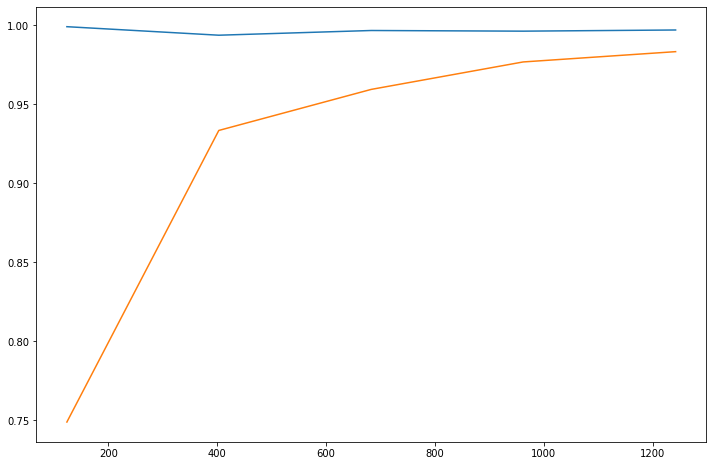

In [40]:

lc=learning_curve(svc,train_x,train_y,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

Model is facing overfitting

As we have used Grid search CV for the best parameters of SVC it gaves us accuracy score of 99%. Changing other parameters of SVC wont make any changes in accuracy score hence those are the best parameters to tackle overfitting.

### SAVING MODEL

In [41]:
joblib.dump(svc, 'Project_14_Car_data.pkl')

['Project_14_Car_data.pkl']

### CONCLUSION

In this project, the data I've imported was unbalanced in nature it was not normally distributed.
I've tried to plot other features corresponding to class, also the features were not highly correlated with each other.

In this, I've tried to implement learning curve by taking reference from sklearn, also used multiple algorithm to find accuracy. Used LogisticRegression with multinomial paramters and GridSearchCV to find parameters for algorithm. And found best accuracy score by using SVC i.e. 99% hence model is facing overfitting.